In [1]:
!pip install -e LAVIS --quiet

In [1]:
import os

import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import torch

from lavis.models import load_model_and_preprocess

### Image captioning test

In [2]:
from lavis.models import model_zoo
print(model_zoo)

Architectures                  Types
albef_classification           ve
albef_feature_extractor        base
albef_nlvr                     nlvr
albef_pretrain                 base
albef_retrieval                coco, flickr
albef_vqa                      vqav2
alpro_qa                       msrvtt, msvd
alpro_retrieval                msrvtt, didemo
blip_caption                   base_coco, large_coco
blip_classification            base
blip_feature_extractor         base
blip_image_text_matching       base, large
blip_nlvr                      nlvr
blip_pretrain                  base
blip_retrieval                 coco, flickr
blip_vqa                       vqav2, okvqa, aokvqa
blip2_opt                      pretrain_opt2.7b, pretrain_opt6.7b, caption_coco_opt2.7b, caption_coco_opt6.7b
blip2_t5                       pretrain_flant5xl, pretrain_flant5xl_vitL, pretrain_flant5xxl, caption_coco_flant5xl
blip2_feature_extractor        pretrain, pretrain_vitL, coco
blip2                      

In [5]:
# setup device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model, vis_processors, _ = load_model_and_preprocess(
    name="blip_caption", model_type="large_coco", is_eval=True, device=device
)

  0%|          | 0.00/1.66G [00:00<?, ?B/s]

In [6]:
data_dir = 'dataset/cogent'
img_dir = os.path.join(data_dir, 'images_resized')


img_fnames = [f for f in os.listdir(img_dir) if f.endswith('.jpg')]

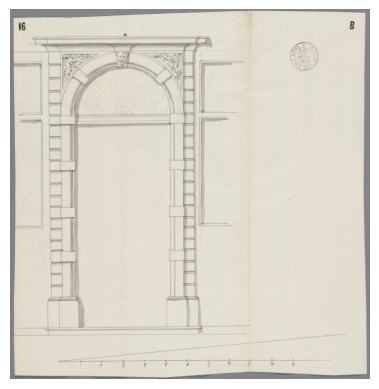

a sketched image of an entry with columns
this is a pencil drawing of a doorway
a drawing of an archway with a clock


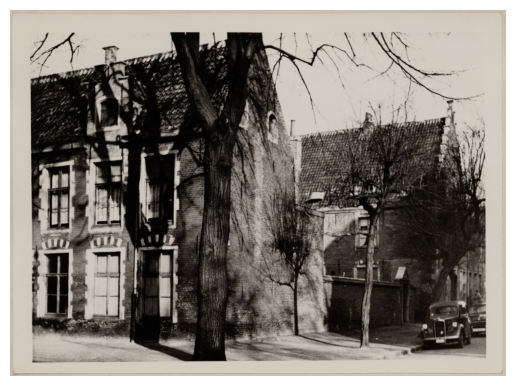

a black and white photo shows a street, a building and cars parked outside it
an old car parked on the sidewalk next to a tall building
an old building is surrounded by trees and some cars


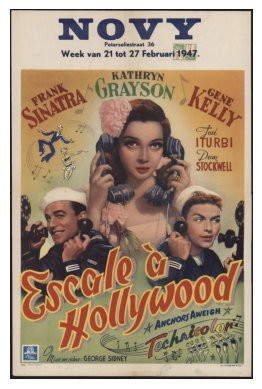

a poster featuring two women with telephone heads
a poster that has the name of the film
a movie poster shows an old hollywood girl talking on the telephone


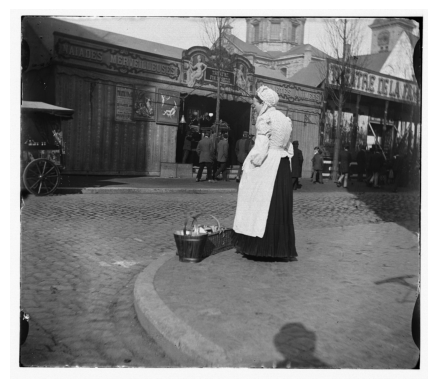

an old photo of a woman with baskets standing in the middle of the road
a vintage photograph of an old lady standing on the sidewalk
a woman stands on a cobblestone in an old photo


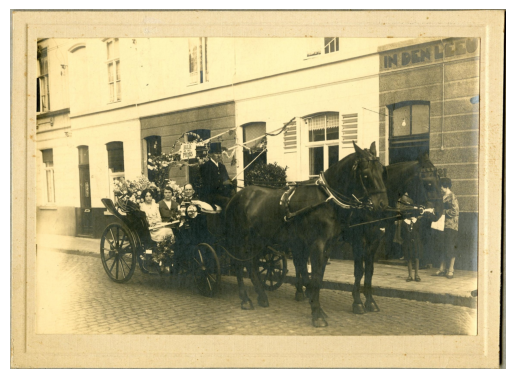

a man and women in a carriage pulling flowers into an antique building
two horses pulling a carriage with passengers on it
the old photo shows a carriage with passengers


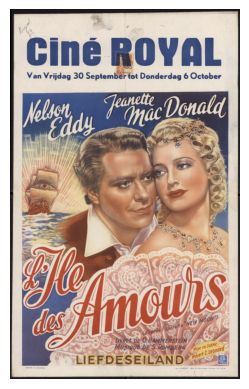

a movie poster for an opera starring le amours
a couple of actors are on a movie poster
the poster for the movie les an amours


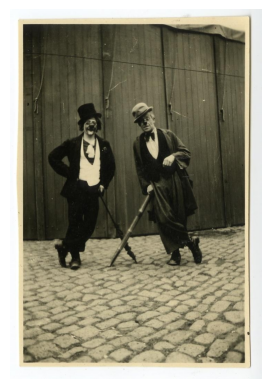

an old time photo shows two man dressed in fancy clothing and top hats walking
two men walking on brick road holding walking sticks
two people with walking sticks, standing on the street


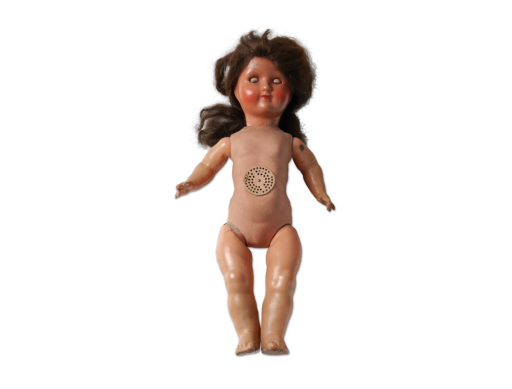

a close up of a doll on a white surface
a toy that is on a stand on a white surface
an old fashioned toy doll on a white background


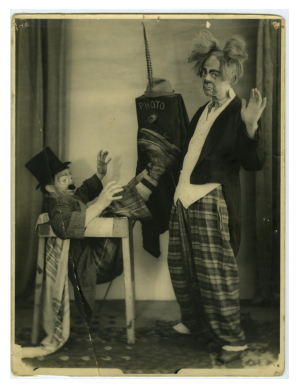

two men are wearing weird costumes while holding their hands
two men wearing costumes, one of which is reaching up
a couple of people with hats on a stage


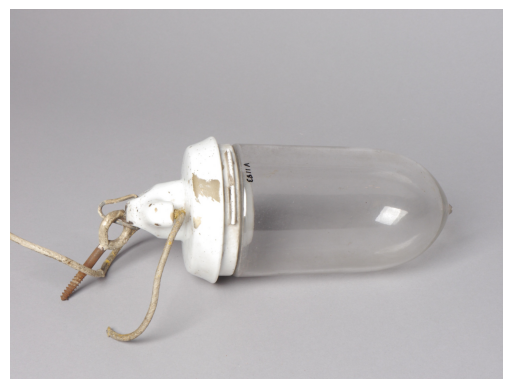

a plastic container with a white lamp on it
a light bulb attached to a white lamp
a light bulb with a cord wrapped around it


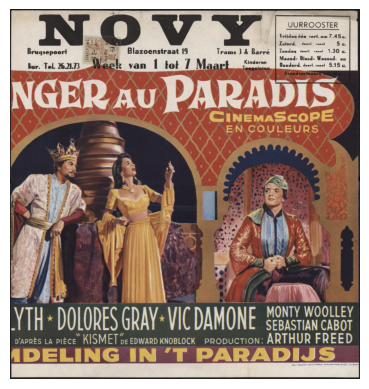

this poster has been designed to resemble the movie
there is a vintage poster for this event
a poster showing an advert for a movie called now


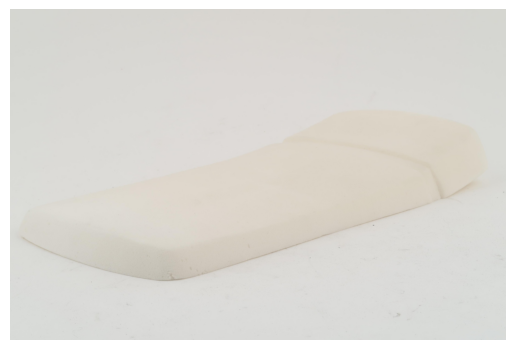

an image of a pillow that is on a table
a bed that is sitting on a table
a white object laying on top of white surface


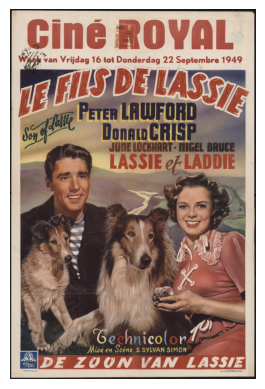

a vintage movie ad for the classic pet service
a poster for the movie let her lasse with her four dogs
a vintage ad for a film featuring a man and two dogs


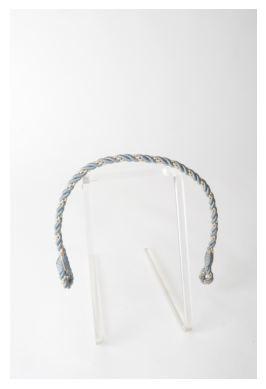

a small bracelet that is placed on a clear display
the rope on the bracelet is attached to the clear base
a close up of a head piece on a table


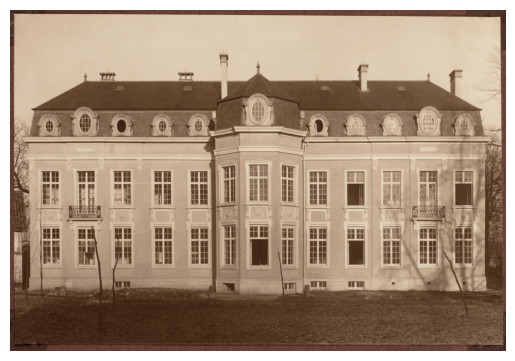

an old brick building is shown in black and white
an old building that is on the side of the street
old photo of a big building with multiple windows


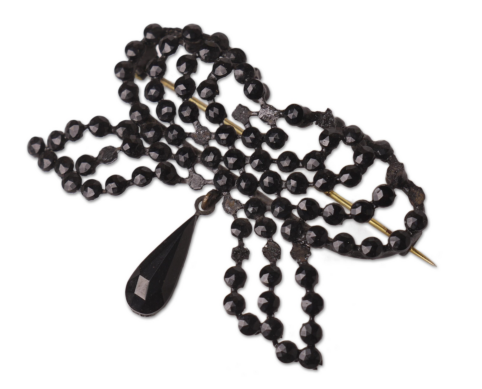

a bead necklace with a tear shaped black stone
a rosary and a tear of blood is displayed
a close up of a bead necklace with a metal pendant attached


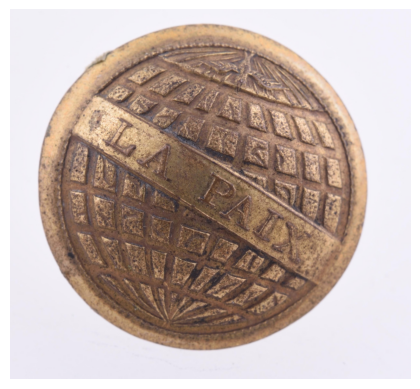

an old button with a small arrow on it
a bronze medallion on a white surface with a design of a circle
a close up of an object on a white surface


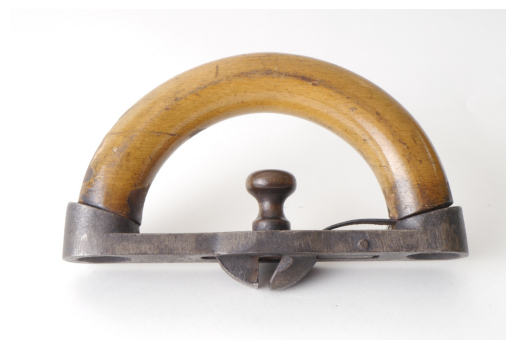

the antique wooden handle on the old pair of scissors
the handle of a wooden stir stirner
an old handle with no handle on it


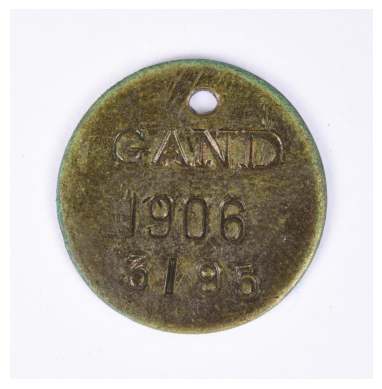

an old coin sitting on top of a white surface
a coin has a tag that reads grand
there is a coin with an image on it


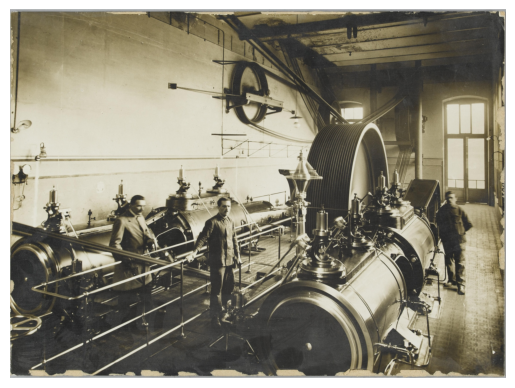

people working inside of a large factory with machines
the men are working on trains inside of the building
men in uniform working on machines in a factory


In [10]:
np.random.shuffle(img_fnames)

for f in img_fnames[:20]:
    img_path = os.path.join(img_dir,f)
    img = Image.open(img_path).convert("RGB")
    plt.imshow(np.array(img))
    plt.axis('off')
    plt.show()
    img = vis_processors["eval"](img).unsqueeze(0).to(device)
    # due to the non-determinstic nature of necleus sampling, you may get different captions.
    for c in model.generate({"image": img}, use_nucleus_sampling=True, num_captions=3):
        print(c)